In [1]:
import sys
!{sys.executable} -m pip install torch torchvision scikit-learn

In [2]:
import pandas as pd
import numpy as np
import torch

In [4]:
from google.colab import files
uploaded = files.upload()


Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train['HomePlanet'].value_counts()

,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759


In [8]:
train['HomePlanet'].isnull().sum()

np.int64(201)

In [9]:
train.head(10)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


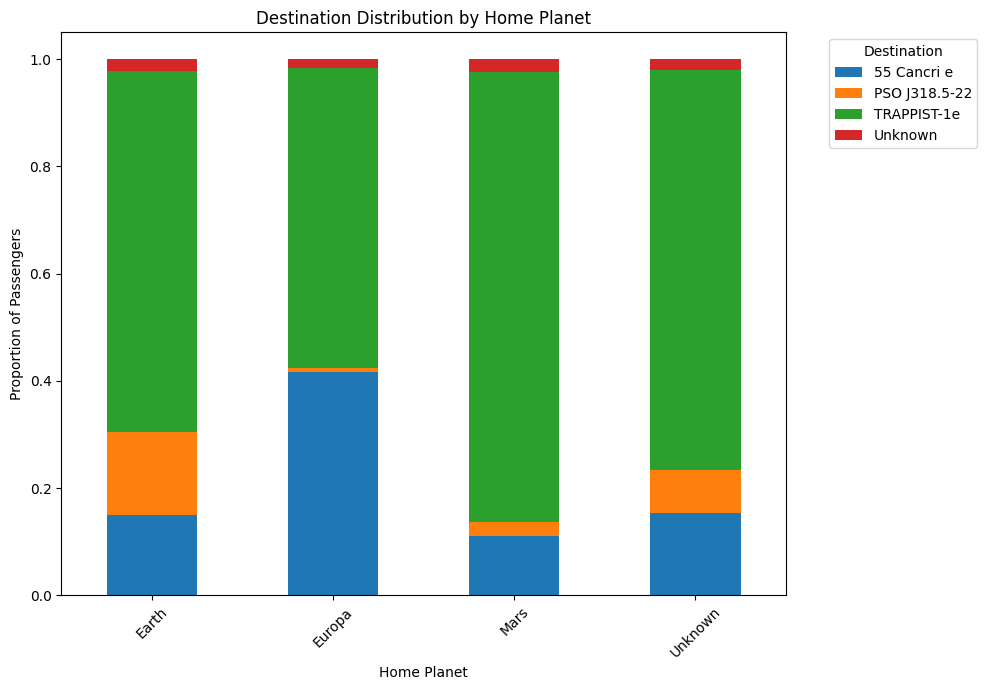

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reload train.csv to get the original 'HomePlanet' and 'Destination' columns
train_plot_dest = pd.read_csv('train.csv')

# Handle potential missing values in HomePlanet and Destination for plotting
train_plot_dest['HomePlanet'] = train_plot_dest['HomePlanet'].fillna('Unknown')
train_plot_dest['Destination'] = train_plot_dest['Destination'].fillna('Unknown')

# Create a cross-tabulation of HomePlanet and Destination counts
destination_homeplanet_counts = pd.crosstab(train_plot_dest['HomePlanet'], train_plot_dest['Destination'])

# Normalize to get percentages for each HomePlanet
destination_homeplanet_percentages = destination_homeplanet_counts.div(destination_homeplanet_counts.sum(1).astype(float), axis=0)

# Plotting the stacked bar chart
destination_homeplanet_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Destination Distribution by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Proportion of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Reload original dataframes to ensure HomePlanet and Destination columns are available
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Apply the conditional filling for 'HomePlanet' in the training data
train.loc[(train['HomePlanet'].isnull()) & (train['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'

# Apply the conditional filling for 'HomePlanet' in the test data
test.loc[(test['HomePlanet'].isnull()) & (test['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'

print("Train DataFrame after conditional imputation for HomePlanet:")
print(train[['HomePlanet', 'Destination']].head(10))

print("\nNumber of nulls in HomePlanet after imputation (Train):", train['HomePlanet'].isnull().sum())
print("Number of nulls in HomePlanet after imputation (Test):", test['HomePlanet'].isnull().sum())

Train DataFrame after conditional imputation for HomePlanet:
  HomePlanet    Destination
0     Europa    TRAPPIST-1e
1      Earth    TRAPPIST-1e
2     Europa    TRAPPIST-1e
3     Europa    TRAPPIST-1e
4      Earth    TRAPPIST-1e
5      Earth  PSO J318.5-22
6      Earth    TRAPPIST-1e
7      Earth    TRAPPIST-1e
8      Earth    TRAPPIST-1e
9     Europa    55 Cancri e

Number of nulls in HomePlanet after imputation (Train): 51
Number of nulls in HomePlanet after imputation (Test): 31


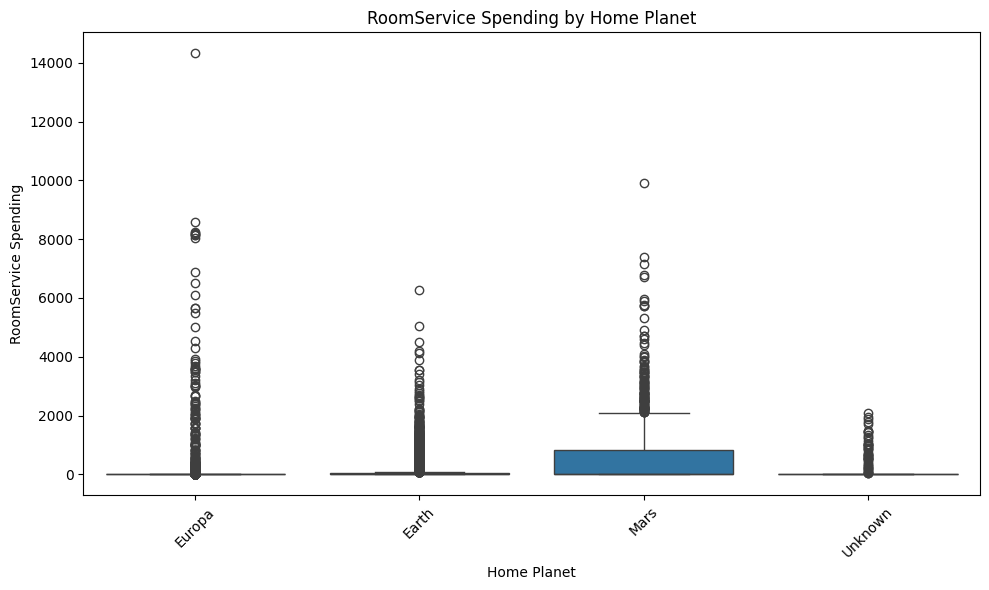

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reload train.csv to get the original 'HomePlanet' and 'RoomService' columns
train_plot_roomservice = pd.read_csv('train.csv')

# Handle potential missing values for plotting
# Fill NaN HomePlanet with 'Unknown' to include them in the plot
train_plot_roomservice['HomePlanet'] = train_plot_roomservice['HomePlanet'].fillna('Unknown')
# Fill NaN RoomService with 0, or consider dropping them for this visualization depending on context
train_plot_roomservice['RoomService'] = train_plot_roomservice['RoomService'].fillna(0)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HomePlanet', y='RoomService', data=train_plot_roomservice)
plt.title('RoomService Spending by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('RoomService Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

# Reload original dataframes to ensure HomePlanet is present and fresh
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# --- Apply previous imputation (Destination == 'TRAPPIST-1e' -> HomePlanet = 'Mars') ---
train.loc[(train['HomePlanet'].isnull()) & (train['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'
test.loc[(test['HomePlanet'].isnull()) & (test['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'

# --- Apply new imputation (HomePlanet is null AND RoomService < 2000 -> HomePlanet = 'Earth') ---
# Note: If RoomService is NaN, the condition 'RoomService < 2000' will evaluate to False,
# so HomePlanet will not be imputed by this rule for those specific rows.
train.loc[(train['HomePlanet'].isnull()) & (train['RoomService'] < 2000), 'HomePlanet'] = 'Earth'
test.loc[(test['HomePlanet'].isnull()) & (test['RoomService'] < 2000), 'HomePlanet'] = 'Earth'

# --- Apply one-hot encoding to 'HomePlanet' as per previous user request ---
# drop_first=False to include all categories (Earth, Europa, Mars) as new columns
train = pd.get_dummies(train, columns=['HomePlanet'], drop_first=False, dtype=int)
test = pd.get_dummies(test, columns=['HomePlanet'], drop_first=False, dtype=int)

# Align columns between train and test to ensure consistency
train_cols = train.columns.tolist()

# Add missing columns to test and set to 0
for col in train_cols:
    if col not in test.columns:
        test[col] = 0

# Remove extra columns from test that are not in train
test = test[train_cols]

print("Train DataFrame head after all HomePlanet imputations and one-hot encoding:")
print(train.head())
print("\nTest DataFrame head after all HomePlanet imputations and one-hot encoding:")
print(test.head())

print("\nNumber of nulls in HomePlanet_Earth after imputation (Train):", train['HomePlanet_Earth'].isnull().sum())
print("Number of nulls in HomePlanet_Earth after imputation (Test):", test['HomePlanet_Earth'].isnull().sum())
print("Number of nulls in HomePlanet_Europa after imputation (Train):", train['HomePlanet_Europa'].isnull().sum())
print("Number of nulls in HomePlanet_Europa after imputation (Test):", test['HomePlanet_Europa'].isnull().sum())
print("Number of nulls in HomePlanet_Mars after imputation (Train):", train['HomePlanet_Mars'].isnull().sum())
print("Number of nulls in HomePlanet_Mars after imputation (Test):", test['HomePlanet_Mars'].isnull().sum())

Train DataFrame head after all HomePlanet imputations and one-hot encoding:
  PassengerId CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     0001_01     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1     0002_01     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4     0004_01     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy        False   
1        9.0          25.0   549.0    44.0       Juanna Vines         True   
2     3576.0           0.0  6715.0    49.0      Altark Susent        False   
3     1283.0         371.0  3329.0   193.0       Solam Susent        False   
4       70.0         151.0   565.0     2.0  Willy Santantines         True   

   HomePlanet_Ea

In [14]:
# Reload original dataframes to ensure 'VIP' column is present and fresh
# This step is crucial because previous operations might have modified 'train' and 'test'
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# --- Apply previous imputation (Destination == 'TRAPPIST-1e' -> HomePlanet = 'Mars') ---
train.loc[(train['HomePlanet'].isnull()) & (train['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'
test.loc[(test['HomePlanet'].isnull()) & (test['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'

# --- Apply previous imputation (HomePlanet is null AND RoomService < 2000 -> HomePlanet = 'Earth') ---
train.loc[(train['HomePlanet'].isnull()) & (train['RoomService'] < 2000), 'HomePlanet'] = 'Earth'
test.loc[(test['HomePlanet'].isnull()) & (test['RoomService'] < 2000), 'HomePlanet'] = 'Earth'

# --- Apply one-hot encoding to 'HomePlanet' as per previous user request ---
# drop_first=False to include all categories (Earth, Europa, Mars) as new columns
train = pd.get_dummies(train, columns=['HomePlanet'], drop_first=False, dtype=int)
test = pd.get_dummies(test, columns=['HomePlanet'], drop_first=False, dtype=int)

# Align columns between train and test to ensure consistency
train_cols = train.columns.tolist()

# Add missing columns to test and set to 0
for col in train_cols:
    if col not in test.columns:
        test[col] = 0

# Remove extra columns from test that are not in train
test = test[train_cols]


# Now, transform the 'VIP' column
# Fill NaN values with False before converting to numeric
train['VIP'] = train['VIP'].fillna(False)
test['VIP'] = test['VIP'].fillna(False)

# Convert boolean 'VIP' to integer (False=0, True=1)
train['VIP'] = train['VIP'].astype(int)
test['VIP'] = test['VIP'].astype(int)

print("Train DataFrame 'VIP' column head after transformation:")
print(train['VIP'].head())
print("\nTest DataFrame 'VIP' column head after transformation:")
print(test['VIP'].head())

print("\nValue counts for 'VIP' in train:")
print(train['VIP'].value_counts())
print("\nValue counts for 'VIP' in test:")
print(test['VIP'].value_counts())

Train DataFrame 'VIP' column head after transformation:
0    0
1    0
2    1
3    0
4    0
Name: VIP, dtype: int64

Test DataFrame 'VIP' column head after transformation:
0    0
1    0
2    0
3    0
4    0
Name: VIP, dtype: int64

Value counts for 'VIP' in train:
VIP
0    8494
1     199
Name: count, dtype: int64

Value counts for 'VIP' in test:
VIP
0    4203
1      74
Name: count, dtype: int64


/tmp/ipython-input-1457366088.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['VIP'] = train['VIP'].fillna(False)
/tmp/ipython-input-1457366088.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['VIP'] = test['VIP'].fillna(False)


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        8693 non-null   object 
 1   CryoSleep          8476 non-null   object 
 2   Cabin              8494 non-null   object 
 3   Destination        8511 non-null   object 
 4   Age                8514 non-null   float64
 5   VIP                8693 non-null   int64  
 6   RoomService        8512 non-null   float64
 7   FoodCourt          8510 non-null   float64
 8   ShoppingMall       8485 non-null   float64
 9   Spa                8510 non-null   float64
 10  VRDeck             8505 non-null   float64
 11  Name               8493 non-null   object 
 12  Transported        8693 non-null   bool   
 13  HomePlanet_Earth   8693 non-null   int64  
 14  HomePlanet_Europa  8693 non-null   int64  
 15  HomePlanet_Mars    8693 non-null   int64  
dtypes: bool(1), float64(6), 

In [16]:
import pandas as pd

# Reload original dataframes to ensure fresh start with all original columns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# --- Apply HomePlanet Imputation 1 (from VhQ3VdX1E5tP) ---
train.loc[(train['HomePlanet'].isnull()) & (train['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'
test.loc[(test['HomePlanet'].isnull()) & (test['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'

# --- Apply HomePlanet Imputation 2 (from 4yhtKoGMIkT2) ---
train.loc[(train['HomePlanet'].isnull()) & (train['RoomService'] < 2000), 'HomePlanet'] = 'Earth'
test.loc[(test['HomePlanet'].isnull()) & (test['RoomService'] < 2000), 'HomePlanet'] = 'Earth'

# --- Apply HomePlanet One-Hot Encoding (from 4yhtKoGMIkT2) ---
train = pd.get_dummies(train, columns=['HomePlanet'], drop_first=False, dtype=int)
test = pd.get_dummies(test, columns=['HomePlanet'], drop_first=False, dtype=int)

# --- Apply VIP Transformation (from YHnsUQ3KJNav) ---
train['VIP'] = train['VIP'].fillna(False).astype(int)
test['VIP'] = test['VIP'].fillna(False).astype(int)

# --- New: CryoSleep Transformation ---
# Fill NaN values with False (assuming not in cryosleep if unknown)
train['CryoSleep'] = train['CryoSleep'].fillna(False)
test['CryoSleep'] = test['CryoSleep'].fillna(False)
# Convert boolean 'CryoSleep' to integer (False=0, True=1)
train['CryoSleep'] = train['CryoSleep'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

# --- New: Destination One-Hot Encoding ---
# Fill NaN values in 'Destination' with 'Unknown' before encoding
train['Destination'] = train['Destination'].fillna('Unknown')
test['Destination'] = test['Destination'].fillna('Unknown')
# Apply one-hot encoding, keeping all categories
train = pd.get_dummies(train, columns=['Destination'], drop_first=False, dtype=int)
test = pd.get_dummies(test, columns=['Destination'], drop_first=False, dtype=int)

# Align columns between train and test for all one-hot encoded features
train_cols = set(train.columns)
test_cols = set(test.columns)

missing_in_test = list(train_cols - test_cols)
for col in missing_in_test:
    test[col] = 0

missing_in_train = list(test_cols - train_cols)
for col in missing_in_train:
    train[col] = 0

# Ensure the order of columns is the same
test = test[train.columns]

print("Train DataFrame head after all transformations:")
print(train.head())
print("\nTest DataFrame head after all transformations:")
print(test.head())

print("\nValue counts for 'CryoSleep' in train:")
print(train['CryoSleep'].value_counts())
print("\nValue counts for 'Destination_TRAPPIST-1e' in train:")
print(train['Destination_TRAPPIST-1e'].value_counts())

Train DataFrame head after all transformations:
  PassengerId  CryoSleep  Cabin   Age  VIP  RoomService  FoodCourt  \
0     0001_01          0  B/0/P  39.0    0          0.0        0.0   
1     0002_01          0  F/0/S  24.0    0        109.0        9.0   
2     0003_01          0  A/0/S  58.0    1         43.0     3576.0   
3     0003_02          0  A/0/S  33.0    0          0.0     1283.0   
4     0004_01          0  F/1/S  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck               Name  Transported  \
0           0.0     0.0     0.0    Maham Ofracculy        False   
1          25.0   549.0    44.0       Juanna Vines         True   
2           0.0  6715.0    49.0      Altark Susent        False   
3         371.0  3329.0   193.0       Solam Susent        False   
4         151.0   565.0     2.0  Willy Santantines         True   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                 0                  1                0   
1         

/tmp/ipython-input-2947967768.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['VIP'] = train['VIP'].fillna(False).astype(int)
/tmp/ipython-input-2947967768.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['VIP'] = test['VIP'].fillna(False).astype(int)
/tmp/ipython-input-2947967768.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Cabin                      8494 non-null   object 
 3   Age                        8514 non-null   float64
 4   VIP                        8693 non-null   int64  
 5   RoomService                8512 non-null   float64
 6   FoodCourt                  8510 non-null   float64
 7   ShoppingMall               8485 non-null   float64
 8   Spa                        8510 non-null   float64
 9   VRDeck                     8505 non-null   float64
 10  Name                       8493 non-null   object 
 11  Transported                8693 non-null   bool   
 12  HomePlanet_Earth           8693 non-null   int64  
 13  HomePlanet_Europa          8693 non-null   int64

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- 1. Data Preprocessing ---

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Imputações de HomePlanet
train_df.loc[(train_df['HomePlanet'].isnull()) & (train_df['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'
test_df.loc[(test_df['HomePlanet'].isnull()) & (test_df['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'
train_df.loc[(train_df['HomePlanet'].isnull()) & (train_df['RoomService'] < 2000), 'HomePlanet'] = 'Earth'
test_df.loc[(test_df['HomePlanet'].isnull()) & (test_df['RoomService'] < 2000), 'HomePlanet'] = 'Earth'

# One-hot encoding HomePlanet
train_df = pd.get_dummies(train_df, columns=['HomePlanet'], drop_first=False, dtype=int)
test_df = pd.get_dummies(test_df, columns=['HomePlanet'], drop_first=False, dtype=int)

# VIP e CryoSleep
train_df['VIP'] = train_df['VIP'].fillna(False).astype(int)
test_df['VIP'] = test_df['VIP'].fillna(False).astype(int)
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(False).astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(False).astype(int)

# Destination
train_df['Destination'] = train_df['Destination'].fillna('Unknown')
test_df['Destination'] = test_df['Destination'].fillna('Unknown')
train_df = pd.get_dummies(train_df, columns=['Destination'], drop_first=False, dtype=int)
test_df = pd.get_dummies(test_df, columns=['Destination'], drop_first=False, dtype=int)

# Alinhar colunas
train_cols_set = set(train_df.columns)
test_cols_set = set(test_df.columns)
for col in train_cols_set - test_cols_set:
    test_df[col] = 0
for col in test_cols_set - train_cols_set:
    train_df[col] = 0
test_df = test_df[train_df.columns]

train_df['Transported'] = train_df['Transported'].astype(int)

numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_cols:
    median_val = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_val)
    test_df[col] = test_df[col].fillna(median_val)

columns_to_drop = ['PassengerId', 'Name', 'Cabin']
train_df = train_df.drop(columns=columns_to_drop, errors='ignore')
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')

X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

X_test_submission = test_df.drop('Transported', axis=1, errors='ignore')
for col in set(X.columns) - set(X_test_submission.columns):
    X_test_submission[col] = 0
X_test_submission = X_test_submission[X.columns]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test_submission[numerical_cols] = scaler.transform(X_test_submission[numerical_cols])

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
X_test_submission_tensor = torch.tensor(X_test_submission.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of features: {X_train_tensor.shape[1]}")

# --- 2. Modelo com regularizações ---
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.3):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.dropout1(self.relu1(self.bn1(self.fc1(x))))
        x = self.dropout2(self.relu2(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        return x



# --- 3. Grid Search Manual ---
criterion = nn.BCEWithLogitsLoss()
hidden_layer_options = [(64, 32), (128, 64), (256, 128)]
learning_rates = [0.001, 0.002,0.0004, 0.0005]
dropout_rates = [0.1, 0.2, 0.3, 0.5]
weight_decays = [0, 1e-4, 1e-3]

best_val_acc = 0
best_params = {}

input_size = X_train_tensor.shape[1]
output_size = 1

print("\nIniciando busca de hiperparâmetros...")
for hidden_size1, hidden_size2 in hidden_layer_options:
    for lr in learning_rates:
        for dropout in dropout_rates:
            for wd in weight_decays:
                model = MLP(input_size, hidden_size1, hidden_size2, output_size, dropout_rate=dropout)
                optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

                # Treino rápido (5 épocas por configuração)
                num_epochs_search = 5
                for epoch in range(num_epochs_search):
                    model.train()
                    for inputs, labels in train_loader:
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()

                # Validação
                model.eval()
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    for inputs, labels in val_loader:
                        outputs = model(inputs)
                        predicted = (torch.sigmoid(outputs) > 0.5).float()
                        total_val += labels.size(0)
                        correct_val += (predicted == labels).sum().item()
                val_acc = correct_val / total_val

                print(f"Hidden=({hidden_size1},{hidden_size2}), LR={lr}, Dropout={dropout}, WD={wd}, ValAcc={val_acc:.4f}")

                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    best_params = {
                        'hidden1': hidden_size1,
                        'hidden2': hidden_size2,
                        'lr': lr,
                        'dropout': dropout,
                        'weight_decay': wd
                    }

print("\nMelhores parâmetros encontrados:")
print(best_params)

# --- 4. Treinamento Final ---
model = MLP(input_size, best_params['hidden1'], best_params['hidden2'], output_size, dropout_rate=best_params['dropout'])
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])
num_epochs = 20

# Initialize lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

print("\nTreinando modelo final...")
for epoch in range(num_epochs):
    model.train()
    train_loss, correct_train, total_train = 0.0, 0, 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = train_loss / len(train_dataset)
    train_acc = correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_dataset)
    val_acc = correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {avg_train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {avg_val_loss:.4f}, Acc: {val_acc:.4f}")

print("Treinamento concluído.")

/tmp/ipython-input-903030384.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['VIP'] = train_df['VIP'].fillna(False).astype(int)
/tmp/ipython-input-903030384.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['VIP'] = test_df['VIP'].fillna(False).astype(int)
/tmp/ipython-input-903030384.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent

Number of features: 15

Iniciando busca de hiperparâmetros...
Hidden=(64,32), LR=0.001, Dropout=0.1, WD=0, ValAcc=0.7832
Hidden=(64,32), LR=0.001, Dropout=0.1, WD=0.0001, ValAcc=0.7844
Hidden=(64,32), LR=0.001, Dropout=0.1, WD=0.001, ValAcc=0.7861
Hidden=(64,32), LR=0.001, Dropout=0.2, WD=0, ValAcc=0.7809
Hidden=(64,32), LR=0.001, Dropout=0.2, WD=0.0001, ValAcc=0.7832
Hidden=(64,32), LR=0.001, Dropout=0.2, WD=0.001, ValAcc=0.7855
Hidden=(64,32), LR=0.001, Dropout=0.3, WD=0, ValAcc=0.7798
Hidden=(64,32), LR=0.001, Dropout=0.3, WD=0.0001, ValAcc=0.7844
Hidden=(64,32), LR=0.001, Dropout=0.3, WD=0.001, ValAcc=0.7769
Hidden=(64,32), LR=0.001, Dropout=0.5, WD=0, ValAcc=0.7780
Hidden=(64,32), LR=0.001, Dropout=0.5, WD=0.0001, ValAcc=0.7815
Hidden=(64,32), LR=0.001, Dropout=0.5, WD=0.001, ValAcc=0.7786
Hidden=(64,32), LR=0.002, Dropout=0.1, WD=0, ValAcc=0.7890
Hidden=(64,32), LR=0.002, Dropout=0.1, WD=0.0001, ValAcc=0.7861
Hidden=(64,32), LR=0.002, Dropout=0.1, WD=0.001, ValAcc=0.7861
Hidden=(

**Reasoning**:
I have successfully modified the final training loop to record training and validation metrics. The next logical step, as per the overall task, is to visualize these metrics as learning curves to assess the model's performance over epochs. I will add a new code block to generate and display the learning curve plots.



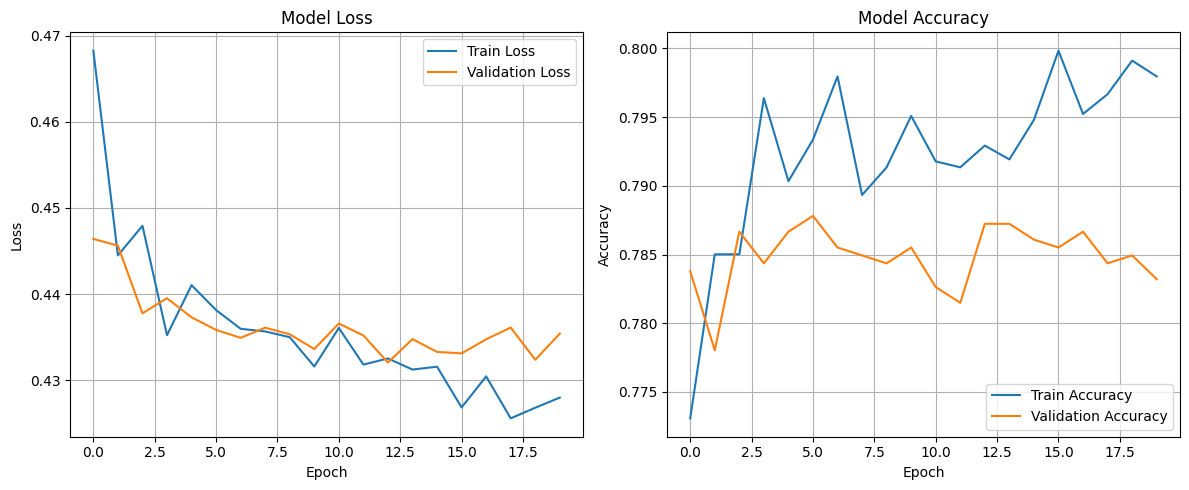

In [19]:
import matplotlib.pyplot as plt

# Plotting the learning curves
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import torch

# Ensure the model is in evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    test_outputs = model(X_test_submission_tensor)
    # Apply sigmoid to outputs and threshold at 0.5 to get binary predictions
    test_predictions = (torch.sigmoid(test_outputs) > 0.5).int().squeeze(1)

# Load the sample submission to get the PassengerId column
sample_submission_df = pd.read_csv('sample_submission.csv')

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': sample_submission_df['PassengerId'],
    'Transported': test_predictions.numpy().astype(bool) # Convert int (0/1) to bool (False/True)
})

# Save the submission file to CSV
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
print(submission_df.head())


Submission file created successfully!
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False
